In [1]:
!pip install tensorflow==2.8.0 tensorflow-gpu==2.8.0 opencv-python sklearn matplotlib

In [2]:
import cv2
import numpy as np
import os
from matplotlib import pyplot as plt
import time
import mediapipe as mp

In [3]:
mp_holistic = mp.solutions.holistic # Holistic model
mp_drawing = mp.solutions.drawing_utils # Drawing utilities

In [4]:
def mediapipe_detection(image, model):
    image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB) # COLOR CONVERSION BGR 2 RGB
    image.flags.writeable = False                  # Image is no longer writeable
    results = model.process(image)                 # Make prediction
    image.flags.writeable = True                   # Image is now writeable 
    image = cv2.cvtColor(image, cv2.COLOR_RGB2BGR) # COLOR COVERSION RGB 2 BGR
    return image, results

In [5]:
def draw_landmarks(image, results):
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION)            #face connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS)            #pose connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS)       #left hand connections
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS)      #right hand connections

In [6]:
def draw_styled_landmarks(image, results):
    #draw face connections
    mp_drawing.draw_landmarks(image, results.face_landmarks, mp.solutions.face_mesh.FACEMESH_TESSELATION,
                             mp_drawing.DrawingSpec(color=(80,110,10), thickness=1, circle_radius=1),
                             mp_drawing.DrawingSpec(color=(80,256,121), thickness=1, circle_radius=1))
    #draw pose connections
    mp_drawing.draw_landmarks(image, results.pose_landmarks, mp_holistic.POSE_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(80,22,10), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(80,44,121), thickness=2, circle_radius=2))
    #draw left hand connections
    mp_drawing.draw_landmarks(image, results.left_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(121,22,76), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(121,44,250), thickness=2, circle_radius=2))
    #draw right hand connection
    mp_drawing.draw_landmarks(image, results.right_hand_landmarks, mp_holistic.HAND_CONNECTIONS,
                             mp_drawing.DrawingSpec(color=(245,117,66), thickness=2, circle_radius=4),
                             mp_drawing.DrawingSpec(color=(245,66,230), thickness=2, circle_radius=2))

In [7]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)

        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>


In [8]:
draw_landmarks(frame, results)

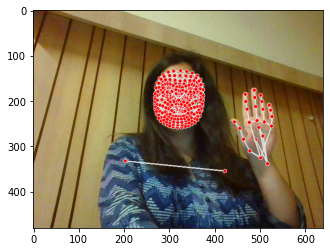

In [9]:
plt.imshow(cv2.cvtColor(frame, cv2.COLOR_BGR2RGB))

In [10]:
len(results.left_hand_landmarks.landmark)

21

In [11]:
pose = []
for res in results.pose_landmarks.landmark:
    test = np.array([res.x, res.y, res.z, res.visibility])
    pose.append(test)

In [12]:
pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(132)
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)
lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)

In [13]:
face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(1404)

In [14]:
def extract_keypoints(results):
    pose = np.array([[res.x, res.y, res.z, res.visibility] for res in results.pose_landmarks.landmark]).flatten() if results.pose_landmarks else np.zeros(33*4)
    face = np.array([[res.x, res.y, res.z] for res in results.face_landmarks.landmark]).flatten() if results.face_landmarks else np.zeros(468*3)
    lh = np.array([[res.x, res.y, res.z] for res in results.left_hand_landmarks.landmark]).flatten() if results.left_hand_landmarks else np.zeros(21*3)
    rh = np.array([[res.x, res.y, res.z] for res in results.right_hand_landmarks.landmark]).flatten() if results.right_hand_landmarks else np.zeros(21*3)
    return np.concatenate([pose, face, lh, rh])

In [15]:
result_test = extract_keypoints(results)

In [16]:
result_test

array([ 0.50278634,  0.41403559, -0.59239447, ...,  0.        ,
        0.        ,  0.        ])

In [17]:
np.save('0', result_test)

In [18]:
np.load('0.npy')

array([ 0.50278634,  0.41403559, -0.59239447, ...,  0.        ,
        0.        ,  0.        ])

In [19]:
# Path for exported data, numpy arrays
DATA_PATH = os.path.join('Data_1') 

# Actions that we try to detect
actions = np.array(['hello','thank you','namaste','yes','teacher','how are you','five','one','c','u'])

# Thirty videos worth of data
no_sequences = 30

# Videos are going to be 30 frames in length
sequence_length = 30

# Folder start
# start_folder = 30

In [20]:
for action in actions: 
    for sequence in range(no_sequences):
        try: 
            os.makedirs(os.path.join(DATA_PATH, action, str(sequence)))
        except:
            pass

In [21]:
cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    
    # NEW LOOP
    # Loop through actions
    for action in actions:
        # Loop through sequences aka videos
        for sequence in range(no_sequences):
            # Loop through video length aka sequence length
            for frame_num in range(sequence_length):

                # Read feed
                ret, frame = cap.read()

                # Make detections
                image, results = mediapipe_detection(frame, holistic)
#                 print(results)

                # Draw landmarks
                draw_styled_landmarks(image, results)
                
                # NEW Apply wait logic
                if frame_num == 0: 
                    cv2.putText(image, 'STARTING COLLECTION', (120,200), 
                               cv2.FONT_HERSHEY_SIMPLEX, 1, (0,255, 0), 4, cv2.LINE_AA)
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                    cv2.waitKey(2000)
                else: 
                    cv2.putText(image, 'Collecting frames for {} Video Number {}'.format(action, sequence), (15,12), 
                               cv2.FONT_HERSHEY_SIMPLEX, 0.5, (0, 0, 255), 1, cv2.LINE_AA)
                    # Show to screen
                    cv2.imshow('OpenCV Feed', image)
                
                # NEW Export keypoints
                keypoints = extract_keypoints(results)
                npy_path = os.path.join(DATA_PATH, action, str(sequence), str(frame_num))
                np.save(npy_path, keypoints)

                # Break gracefully
                if cv2.waitKey(10) & 0xFF == ord('q'):
                    break
                    
    cap.release()
    cv2.destroyAllWindows()

In [22]:
from sklearn.model_selection import train_test_split
from tensorflow.keras.utils import to_categorical

In [23]:
label_map = {label:num for num, label in enumerate(actions)}

In [24]:
label_map

{'hello': 0,
 'thank you': 1,
 'namaste': 2,
 'yes': 3,
 'teacher': 4,
 'how are you': 5,
 'five': 6,
 'one': 7,
 'c': 8,
 'u': 9}

In [25]:
sequences, labels = [], []
for action in actions:
    for sequence in range(no_sequences):
        window = []
        for frame_num in range(sequence_length):
            res = np.load(os.path.join(DATA_PATH, action, str(sequence), "{}.npy".format(frame_num)))
            window.append(res)
        sequences.append(window)
        labels.append(label_map[action])

In [26]:
sequences

[[array([ 0.50899386,  0.4736768 , -0.56058693, ...,  0.45943746,
          0.53972679, -0.01851023]),
  array([ 0.4961217 ,  0.45101756, -0.85337245, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.49041733,  0.4460327 , -0.87897205, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47990412,  0.44639924, -0.76801527, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.4777078 ,  0.44652411, -0.8329283 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47763771,  0.44593132, -0.79383957, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.47862458,  0.44463784, -0.77388608, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48362866,  0.4444212 , -0.7700628 , ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48538408,  0.44463983, -0.78937042, ...,  0.        ,
          0.        ,  0.        ]),
  array([ 0.48652905,  0.44486257, -0.81188238, ...,  0.        ,
       

In [27]:
np.array(sequences).shape

(300, 30, 1662)

In [28]:
np.array(labels).shape

(300,)

In [29]:
X = np.array(sequences)

In [30]:
X.shape

(300, 30, 1662)

In [31]:
y = to_categorical(labels).astype(int)

In [32]:
y

array([[1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       [1, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1],
       [0, 0, 0, ..., 0, 0, 1]])

In [33]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.05)

In [34]:
y_test.shape

(15, 10)

In [35]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import LSTM, Dense
from tensorflow.keras.callbacks import TensorBoard

In [36]:
log_dir = os.path.join('Logs')
tb_callback = TensorBoard(log_dir=log_dir)

In [37]:
model = Sequential()
model.add(LSTM(64, return_sequences=True, activation='relu', input_shape=(30,1662)))
model.add(LSTM(128, return_sequences=True, activation='relu'))
model.add(LSTM(64, return_sequences=False, activation='relu'))
model.add(Dense(64, activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(actions.shape[0], activation='softmax'))

In [39]:
res = [0.7, 0.2, 0.1,0.4,0.3,0.1,0.2,0.4,0.5,0.6]

In [40]:
actions[np.argmax(res)]

'hello'

In [41]:
model.compile(optimizer='Adam', loss='categorical_crossentropy', metrics=['categorical_accuracy'])

In [42]:
model.fit(X_train, y_train, epochs=2000, callbacks=[tb_callback])

Epoch 1/2000
9/9 [==============================] - 5s 81ms/step - loss: 4.3511 - categorical_accuracy: 0.1123
Epoch 2/2000
9/9 [==============================] - 2s 190ms/step - loss: 3.7329 - categorical_accuracy: 0.1018
Epoch 3/2000
9/9 [==============================] - 1s 132ms/step - loss: 2.3629 - categorical_accuracy: 0.0842
Epoch 4/2000
9/9 [==============================] - 1s 87ms/step - loss: 2.2961 - categorical_accuracy: 0.1579
Epoch 5/2000
9/9 [==============================] - 1s 81ms/step - loss: 2.2404 - categorical_accuracy: 0.1895
Epoch 6/2000
9/9 [==============================] - 1s 78ms/step - loss: 2.2002 - categorical_accuracy: 0.1684
Epoch 7/2000
9/9 [==============================] - 1s 80ms/step - loss: 2.1622 - categorical_accuracy: 0.1474
Epoch 8/2000
9/9 [==============================] - 1s 80ms/step - loss: 2.1576 - categorical_accuracy: 0.1018
Epoch 9/2000
9/9 [==============================] - 1s 80ms/step - loss: 2.1188 - categorical_accuracy: 0.1754

9/9 [==============================] - 1s 97ms/step - loss: 0.6038 - categorical_accuracy: 0.7158
Epoch 146/2000
9/9 [==============================] - 1s 98ms/step - loss: 0.8383 - categorical_accuracy: 0.6246
Epoch 147/2000
9/9 [==============================] - 1s 96ms/step - loss: 0.7541 - categorical_accuracy: 0.6772
Epoch 148/2000
9/9 [==============================] - 1s 100ms/step - loss: 0.6095 - categorical_accuracy: 0.7684
Epoch 149/2000
9/9 [==============================] - 1s 93ms/step - loss: 0.5066 - categorical_accuracy: 0.8211
Epoch 150/2000
9/9 [==============================] - 1s 93ms/step - loss: 0.4913 - categorical_accuracy: 0.7684
Epoch 151/2000
9/9 [==============================] - 1s 93ms/step - loss: 0.5202 - categorical_accuracy: 0.7754
Epoch 152/2000
9/9 [==============================] - 1s 96ms/step - loss: 0.7168 - categorical_accuracy: 0.7368
Epoch 153/2000
9/9 [==============================] - 1s 94ms/step - loss: 0.6943 - categorical_accuracy: 0.70

9/9 [==============================] - 1s 93ms/step - loss: 0.1085 - categorical_accuracy: 0.9579
Epoch 290/2000
9/9 [==============================] - 1s 92ms/step - loss: 0.0977 - categorical_accuracy: 0.9614
Epoch 291/2000
9/9 [==============================] - 1s 95ms/step - loss: 0.1470 - categorical_accuracy: 0.9333
Epoch 292/2000
9/9 [==============================] - 1s 93ms/step - loss: 0.1381 - categorical_accuracy: 0.9368
Epoch 293/2000
9/9 [==============================] - 1s 92ms/step - loss: 0.1204 - categorical_accuracy: 0.9544
Epoch 294/2000
9/9 [==============================] - 1s 92ms/step - loss: 0.1063 - categorical_accuracy: 0.9544
Epoch 295/2000
9/9 [==============================] - 1s 93ms/step - loss: 0.1110 - categorical_accuracy: 0.9754
Epoch 296/2000
9/9 [==============================] - 1s 93ms/step - loss: 0.1610 - categorical_accuracy: 0.9158
Epoch 297/2000
9/9 [==============================] - 1s 91ms/step - loss: 0.2086 - categorical_accuracy: 0.898

9/9 [==============================] - 1s 101ms/step - loss: 0.1553 - categorical_accuracy: 0.9368
Epoch 434/2000
9/9 [==============================] - 1s 99ms/step - loss: 0.1933 - categorical_accuracy: 0.9193
Epoch 435/2000
9/9 [==============================] - 1s 102ms/step - loss: 0.1341 - categorical_accuracy: 0.9649
Epoch 436/2000
9/9 [==============================] - 1s 97ms/step - loss: 0.1282 - categorical_accuracy: 0.9614
Epoch 437/2000
9/9 [==============================] - 1s 103ms/step - loss: 0.1344 - categorical_accuracy: 0.9439
Epoch 438/2000
9/9 [==============================] - 1s 95ms/step - loss: 0.0960 - categorical_accuracy: 0.9649
Epoch 439/2000
9/9 [==============================] - 1s 95ms/step - loss: 0.1171 - categorical_accuracy: 0.9719
Epoch 440/2000
9/9 [==============================] - 1s 93ms/step - loss: 0.0924 - categorical_accuracy: 0.9719
Epoch 441/2000
9/9 [==============================] - 1s 95ms/step - loss: 0.0903 - categorical_accuracy: 0.

9/9 [==============================] - 1s 94ms/step - loss: 2.0209 - categorical_accuracy: 0.2421
Epoch 578/2000
9/9 [==============================] - 1s 94ms/step - loss: 1.9872 - categorical_accuracy: 0.2632
Epoch 579/2000
9/9 [==============================] - 1s 94ms/step - loss: 1.9933 - categorical_accuracy: 0.2456
Epoch 580/2000
9/9 [==============================] - 1s 94ms/step - loss: 1.9187 - categorical_accuracy: 0.3018
Epoch 581/2000
9/9 [==============================] - 1s 92ms/step - loss: 1.9113 - categorical_accuracy: 0.2561
Epoch 582/2000
9/9 [==============================] - 1s 93ms/step - loss: 2.0581 - categorical_accuracy: 0.2702
Epoch 583/2000
9/9 [==============================] - 1s 92ms/step - loss: 2.4394 - categorical_accuracy: 0.1053
Epoch 584/2000
9/9 [==============================] - 1s 91ms/step - loss: 2.2966 - categorical_accuracy: 0.1123
Epoch 585/2000
9/9 [==============================] - 1s 94ms/step - loss: 2.2849 - categorical_accuracy: 0.105

9/9 [==============================] - 1s 98ms/step - loss: 1.9310 - categorical_accuracy: 0.2386
Epoch 722/2000
9/9 [==============================] - 1s 95ms/step - loss: 1.8075 - categorical_accuracy: 0.2702
Epoch 723/2000
9/9 [==============================] - 1s 94ms/step - loss: 1.7637 - categorical_accuracy: 0.3018
Epoch 724/2000
9/9 [==============================] - 1s 99ms/step - loss: 1.7011 - categorical_accuracy: 0.2807
Epoch 725/2000
9/9 [==============================] - 1s 102ms/step - loss: 1.6437 - categorical_accuracy: 0.2491
Epoch 726/2000
9/9 [==============================] - 1s 99ms/step - loss: 1.6174 - categorical_accuracy: 0.2561
Epoch 727/2000
9/9 [==============================] - 1s 128ms/step - loss: 1.5931 - categorical_accuracy: 0.2912
Epoch 728/2000
9/9 [==============================] - 1s 98ms/step - loss: 1.6054 - categorical_accuracy: 0.2491
Epoch 729/2000
9/9 [==============================] - 1s 106ms/step - loss: 1.5879 - categorical_accuracy: 0.

9/9 [==============================] - 1s 114ms/step - loss: 1.0281 - categorical_accuracy: 0.5965
Epoch 794/2000
9/9 [==============================] - 1s 116ms/step - loss: 1.0306 - categorical_accuracy: 0.5474
Epoch 795/2000
9/9 [==============================] - 1s 115ms/step - loss: 1.0912 - categorical_accuracy: 0.5439
Epoch 796/2000
9/9 [==============================] - 1s 115ms/step - loss: 1.1755 - categorical_accuracy: 0.4982
Epoch 797/2000
9/9 [==============================] - 1s 116ms/step - loss: 1.0642 - categorical_accuracy: 0.5544
Epoch 798/2000
9/9 [==============================] - 1s 110ms/step - loss: 1.0673 - categorical_accuracy: 0.5754
Epoch 799/2000
9/9 [==============================] - 1s 112ms/step - loss: 1.0931 - categorical_accuracy: 0.5333
Epoch 800/2000
9/9 [==============================] - 1s 111ms/step - loss: 1.1480 - categorical_accuracy: 0.5123
Epoch 801/2000
9/9 [==============================] - 1s 111ms/step - loss: 1.0474 - categorical_accura

9/9 [==============================] - 1s 98ms/step - loss: 0.5339 - categorical_accuracy: 0.8175
Epoch 938/2000
9/9 [==============================] - 1s 101ms/step - loss: 0.5097 - categorical_accuracy: 0.8175
Epoch 939/2000
9/9 [==============================] - 1s 98ms/step - loss: 0.5431 - categorical_accuracy: 0.7930
Epoch 940/2000
9/9 [==============================] - 1s 99ms/step - loss: 0.5796 - categorical_accuracy: 0.7719
Epoch 941/2000
9/9 [==============================] - 1s 101ms/step - loss: 0.6216 - categorical_accuracy: 0.7719
Epoch 942/2000
9/9 [==============================] - 1s 97ms/step - loss: 0.5535 - categorical_accuracy: 0.7930
Epoch 943/2000
9/9 [==============================] - 1s 95ms/step - loss: 0.5671 - categorical_accuracy: 0.7754
Epoch 944/2000
9/9 [==============================] - 1s 97ms/step - loss: 0.5038 - categorical_accuracy: 0.7965
Epoch 945/2000
9/9 [==============================] - 1s 96ms/step - loss: 0.5968 - categorical_accuracy: 0.7

9/9 [==============================] - 1s 96ms/step - loss: 0.5145 - categorical_accuracy: 0.7860
Epoch 1081/2000
9/9 [==============================] - 1s 96ms/step - loss: 0.4366 - categorical_accuracy: 0.8386
Epoch 1082/2000
9/9 [==============================] - 1s 99ms/step - loss: 0.4272 - categorical_accuracy: 0.8561
Epoch 1083/2000
9/9 [==============================] - 1s 95ms/step - loss: 0.3909 - categorical_accuracy: 0.8912
Epoch 1084/2000
9/9 [==============================] - 1s 96ms/step - loss: 0.3371 - categorical_accuracy: 0.9018
Epoch 1085/2000
9/9 [==============================] - 1s 95ms/step - loss: 0.3205 - categorical_accuracy: 0.9123
Epoch 1086/2000
9/9 [==============================] - 1s 97ms/step - loss: 0.3115 - categorical_accuracy: 0.9228
Epoch 1087/2000
9/9 [==============================] - 1s 94ms/step - loss: 0.3347 - categorical_accuracy: 0.8947
Epoch 1088/2000
9/9 [==============================] - 1s 95ms/step - loss: 0.3128 - categorical_accurac

9/9 [==============================] - 1s 93ms/step - loss: 0.8154 - categorical_accuracy: 0.5930
Epoch 1223/2000
9/9 [==============================] - 1s 94ms/step - loss: 0.8244 - categorical_accuracy: 0.6000
Epoch 1224/2000
9/9 [==============================] - 1s 93ms/step - loss: 0.8256 - categorical_accuracy: 0.5439
Epoch 1225/2000
9/9 [==============================] - 1s 92ms/step - loss: 0.8089 - categorical_accuracy: 0.6070
Epoch 1226/2000
9/9 [==============================] - 1s 97ms/step - loss: 0.8104 - categorical_accuracy: 0.6105
Epoch 1227/2000
9/9 [==============================] - 1s 94ms/step - loss: 0.8096 - categorical_accuracy: 0.6175
Epoch 1228/2000
9/9 [==============================] - 1s 97ms/step - loss: 1.4155 - categorical_accuracy: 0.4842
Epoch 1229/2000
9/9 [==============================] - 1s 95ms/step - loss: 1.2947 - categorical_accuracy: 0.4456
Epoch 1230/2000
9/9 [==============================] - 1s 96ms/step - loss: 1.0945 - categorical_accurac

9/9 [==============================] - 1s 95ms/step - loss: 0.2679 - categorical_accuracy: 0.8912
Epoch 1365/2000
9/9 [==============================] - 1s 94ms/step - loss: 0.1779 - categorical_accuracy: 0.9404
Epoch 1366/2000
9/9 [==============================] - 1s 100ms/step - loss: 0.1380 - categorical_accuracy: 0.9439
Epoch 1367/2000
9/9 [==============================] - 1s 98ms/step - loss: 0.1077 - categorical_accuracy: 0.9684
Epoch 1368/2000
9/9 [==============================] - 1s 97ms/step - loss: 0.1176 - categorical_accuracy: 0.9579
Epoch 1369/2000
9/9 [==============================] - 1s 99ms/step - loss: 0.1517 - categorical_accuracy: 0.9404
Epoch 1370/2000
9/9 [==============================] - 1s 100ms/step - loss: 0.1299 - categorical_accuracy: 0.9439
Epoch 1371/2000
9/9 [==============================] - 1s 97ms/step - loss: 0.1101 - categorical_accuracy: 0.9614
Epoch 1372/2000
9/9 [==============================] - 1s 99ms/step - loss: 0.0837 - categorical_accur

9/9 [==============================] - 1s 105ms/step - loss: 0.0899 - categorical_accuracy: 0.9860
Epoch 1507/2000
9/9 [==============================] - 1s 105ms/step - loss: 0.0831 - categorical_accuracy: 0.9754
Epoch 1508/2000
9/9 [==============================] - 1s 109ms/step - loss: 0.0672 - categorical_accuracy: 0.9825
Epoch 1509/2000
9/9 [==============================] - 1s 109ms/step - loss: 0.0660 - categorical_accuracy: 0.9825
Epoch 1510/2000
9/9 [==============================] - 1s 106ms/step - loss: 0.0582 - categorical_accuracy: 0.9860
Epoch 1511/2000
9/9 [==============================] - 1s 108ms/step - loss: 0.0607 - categorical_accuracy: 0.9825
Epoch 1512/2000
9/9 [==============================] - 1s 108ms/step - loss: 0.0647 - categorical_accuracy: 0.9825
Epoch 1513/2000
9/9 [==============================] - 1s 106ms/step - loss: 0.0581 - categorical_accuracy: 0.9825
Epoch 1514/2000
9/9 [==============================] - 1s 112ms/step - loss: 0.0518 - categorica

9/9 [==============================] - 1s 114ms/step - loss: 0.0833 - categorical_accuracy: 0.9719
Epoch 1649/2000
9/9 [==============================] - 1s 116ms/step - loss: 0.0889 - categorical_accuracy: 0.9719
Epoch 1650/2000
9/9 [==============================] - 1s 117ms/step - loss: 0.1018 - categorical_accuracy: 0.9684
Epoch 1651/2000
9/9 [==============================] - 1s 123ms/step - loss: 0.1139 - categorical_accuracy: 0.9509
Epoch 1652/2000
9/9 [==============================] - 1s 125ms/step - loss: 0.1412 - categorical_accuracy: 0.9544
Epoch 1653/2000
9/9 [==============================] - 1s 122ms/step - loss: 0.1552 - categorical_accuracy: 0.9333
Epoch 1654/2000
9/9 [==============================] - 1s 122ms/step - loss: 0.3911 - categorical_accuracy: 0.8807
Epoch 1655/2000
9/9 [==============================] - 1s 123ms/step - loss: 0.2419 - categorical_accuracy: 0.8912
Epoch 1656/2000
9/9 [==============================] - 1s 120ms/step - loss: 0.4067 - categorica

9/9 [==============================] - 1s 128ms/step - loss: 0.0744 - categorical_accuracy: 0.9649
Epoch 1791/2000
9/9 [==============================] - 1s 129ms/step - loss: 0.0966 - categorical_accuracy: 0.9579
Epoch 1792/2000
9/9 [==============================] - 1s 127ms/step - loss: 0.0679 - categorical_accuracy: 0.9825
Epoch 1793/2000
9/9 [==============================] - 1s 118ms/step - loss: 0.0834 - categorical_accuracy: 0.9719
Epoch 1794/2000
9/9 [==============================] - 1s 116ms/step - loss: 0.1238 - categorical_accuracy: 0.9579
Epoch 1795/2000
9/9 [==============================] - 1s 143ms/step - loss: 0.1038 - categorical_accuracy: 0.9544
Epoch 1796/2000
9/9 [==============================] - 1s 130ms/step - loss: 0.1381 - categorical_accuracy: 0.9474
Epoch 1797/2000
9/9 [==============================] - 1s 128ms/step - loss: 0.0781 - categorical_accuracy: 0.9754
Epoch 1798/2000
9/9 [==============================] - 1s 120ms/step - loss: 0.0643 - categorica

9/9 [==============================] - 1s 126ms/step - loss: 0.0845 - categorical_accuracy: 0.9684
Epoch 1933/2000
9/9 [==============================] - 1s 119ms/step - loss: 1.9057 - categorical_accuracy: 0.7544
Epoch 1934/2000
9/9 [==============================] - 1s 120ms/step - loss: 3.1163 - categorical_accuracy: 0.4667
Epoch 1935/2000
9/9 [==============================] - 1s 119ms/step - loss: 1.4573 - categorical_accuracy: 0.4070
Epoch 1936/2000
9/9 [==============================] - 1s 119ms/step - loss: 0.8501 - categorical_accuracy: 0.7333
Epoch 1937/2000
9/9 [==============================] - 1s 116ms/step - loss: 0.6722 - categorical_accuracy: 0.8351
Epoch 1938/2000
9/9 [==============================] - 1s 112ms/step - loss: 0.5484 - categorical_accuracy: 0.8667
Epoch 1939/2000
9/9 [==============================] - 1s 113ms/step - loss: 0.4339 - categorical_accuracy: 0.9088
Epoch 1940/2000
9/9 [==============================] - 1s 114ms/step - loss: 0.3933 - categorica

In [43]:
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 lstm (LSTM)                 (None, 30, 64)            442112    
                                                                 
 lstm_1 (LSTM)               (None, 30, 128)           98816     
                                                                 
 lstm_2 (LSTM)               (None, 64)                49408     
                                                                 
 dense (Dense)               (None, 64)                4160      
                                                                 
 dense_1 (Dense)             (None, 32)                2080      
                                                                 
 dense_2 (Dense)             (None, 10)                330       
                                                                 
Total params: 596,906
Trainable params: 596,906
Non-trai

In [44]:
res = model.predict(X_test)

In [45]:
actions[np.argmax(res[0])]

'hello'

In [46]:
actions[np.argmax(y_test[0])]

'hello'

In [47]:
model.save('action.h5')

In [48]:
# del model

In [49]:
model.load_weights('action.h5')

In [50]:
from sklearn.metrics import multilabel_confusion_matrix, accuracy_score

In [51]:
yhat = model.predict(X_test)

In [52]:
ytrue = np.argmax(y_test, axis=1).tolist()
yhat = np.argmax(yhat, axis=1).tolist()

In [53]:
multilabel_confusion_matrix(ytrue, yhat)

array([[[10,  1],
        [ 0,  4]],

       [[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]],

       [[14,  0],
        [ 0,  1]],

       [[12,  0],
        [ 0,  3]],

       [[14,  0],
        [ 1,  0]],

       [[13,  0],
        [ 0,  2]],

       [[14,  0],
        [ 0,  1]]], dtype=int64)

In [54]:
accuracy_score(ytrue, yhat)

0.9333333333333333

In [58]:
sequence.reverse()

In [59]:
len(sequence)

30

In [60]:
sequence.append('def')

In [61]:
sequence.reverse()

In [62]:
sequence[-30:]

[array([ 0.43565178,  0.30872318, -1.52011764, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.43503737,  0.31017551, -1.51485991, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.43883982,  0.31399831, -1.38115621, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.44925147,  0.32590583, -1.40120625, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.45489326,  0.33300012, -1.44976246, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.48569578,  0.35897648, -1.71422732, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.49563655,  0.37000144, -1.77350688, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.5229786 ,  0.39501163, -1.70826054, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.55864745,  0.42016363, -1.23225439, ...,  0.        ,
         0.        ,  0.        ]),
 array([ 0.5659216 ,  0.43039474, -1.10315716, ...,  0.        ,
         0.        ,  0.  

In [67]:
# 1. New detection variables
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
       # draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                
            
            #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

        # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe

<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste


In [69]:
cap.release()
cv2.destroyAllWindows()

In [110]:
res[np.argmax(res)] > threshold

True

In [67]:
model.predict(np.expand_dims(X_test[0], axis=0))

array([[1.871747e-09, 5.435642e-08, 1.000000e+00]], dtype=float32)

In [69]:
# model=pickle.load(open('model.pkl','rb'))
model.save("my_model_new")

INFO:tensorflow:Assets written to: my_model_new\assets


INFO:tensorflow:Assets written to: my_model_new\assets


In [72]:
model_1=keras.models.load_model('_model_')

In [61]:
from tensorflow import keras

In [ ]:
sequence = []
sentence = []
predictions = []
threshold = 0.1

cap = cv2.VideoCapture(0)
# Set mediapipe model 
with mp_holistic.Holistic(min_detection_confidence=0.5, min_tracking_confidence=0.5) as holistic:
    while cap.isOpened():

        # Read feed
        ret, frame = cap.read()

        # Make detections
        image, results = mediapipe_detection(frame, holistic)
        print(results)
        
        # Draw landmarks
        draw_styled_landmarks(image, results)
        
        # 2. Prediction logic
        keypoints = extract_keypoints(results)
#         sequence.insert(0,keypoints)
#         sequence = sequence[:30]
        sequence.append(keypoints)
        sequence = sequence[-30:]
        
        if len(sequence) == 30:
            res = model_1.predict(np.expand_dims(sequence, axis=0))[0]
            print(actions[np.argmax(res)])
            predictions.append(np.argmax(res))
            if np.unique(predictions[-10:])[0]==np.argmax(res):
                
            
            #3. Viz logic
                if res[np.argmax(res)] > threshold: 
                    if len(sentence) > 0: 
                        if actions[np.argmax(res)] != sentence[-1]:
                            sentence.append(actions[np.argmax(res)])
                    else:
                        sentence.append(actions[np.argmax(res)])

            if len(sentence) > 5: 
                sentence = sentence[-5:]

        # Viz probabilities
            #image = prob_viz(res, actions, image, colors)
            
        cv2.rectangle(image, (0,0), (640, 40), (245, 117, 16), -1)
        cv2.putText(image, ' '.join(sentence), (3,30), 
                       cv2.FONT_HERSHEY_SIMPLEX, 1, (255, 255, 255), 2, cv2.LINE_AA)
        
        # Show to screen
        cv2.imshow('OpenCV Feed', image)

        # Break gracefully
        if cv2.waitKey(10) & 0xFF == ord('q'):
            break
    cap.release()
    cv2.destroyAllWindows()

<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.solution_base.SolutionOutputs'>
<class 'mediapipe.python.soluti

<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.solution_base.SolutionOutputs'>
namaste
<class 'mediapipe.python.

In [71]:
model.save('_model_')

INFO:tensorflow:Assets written to: _model_\assets
